In [1]:
us_housing_urban_marketrent_2018url = 'https://assets.datacamp.com/production/repositories/2210/datasets/a1fb97d60bfbcf0661e320a35a4615f4e8661a68/FY18_4050_FMRs.csv'

dc_bike_share_url = 'https://assets.datacamp.com/production/repositories/2210/datasets/fb4f2c1039e3df2c2e2624a8c95de5a1980861c6/bike_share.csv'

college_data_url = 'https://assets.datacamp.com/production/repositories/2210/datasets/794e0759b73a2d80baa5d8fb88636a47965139d3/college_datav3.csv'

daily_show_guest_url = 'https://assets.datacamp.com/production/repositories/2210/datasets/4eead0f82a80136cdc0068cfb54b97fe47c23c15/daily_show_guests_cleaned.csv'

insurance_premiums_url = 'https://assets.datacamp.com/production/repositories/2210/datasets/1a8176dc594fc0a13a9f1a7b207d30ed312f2e4a/insurance_premiums.csv'

school_improvements_2010url = 'https://assets.datacamp.com/production/repositories/2210/datasets/205443d734f177d36dad2f0bdf821a57b2c4cc13/schoolimprovement2010grants.csv'



1.   **Seaborn Introduction**
2.   **Customizing Seaborn Plots**
3.   **Additional Plot Types**
4.   **Creating Plots on Data Aware Grids**



# Introduction to Seaborn
## Reading a CSV file

In [2]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the DataFrame
df = pd.read_csv(school_improvements_2010url)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Comparing a histogram and displot

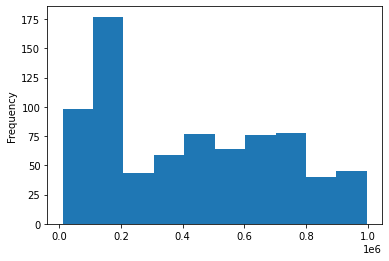

In [3]:
# Display pandas histogram
df['Award_Amount'].plot.hist()
plt.show()

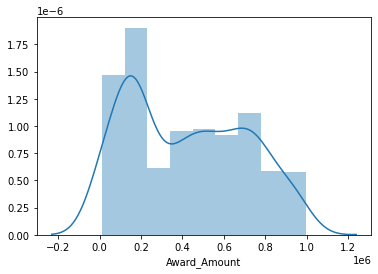

In [4]:
# Display a Seaborn displot
sns.distplot(df['Award_Amount'])
plt.show()

# Using the distribution plot
## Plot a histogram
      Kernel Density Estimate(KDE)

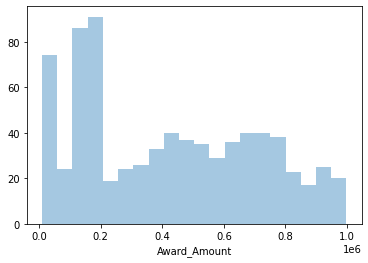

In [5]:
# Create a displot
sns.distplot(df['Award_Amount'], kde=False, bins=20)
plt.show()

## Rug plot and kde shading

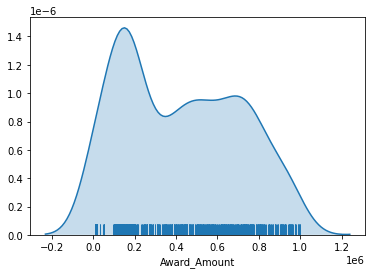

In [6]:
# Create a displot of the Award Amount
sns.distplot(df['Award_Amount'], hist=False, rug=True, kde_kws={'shade':True})

plt.show()

# Regression Plots in Seaborn
## Create a regression plot

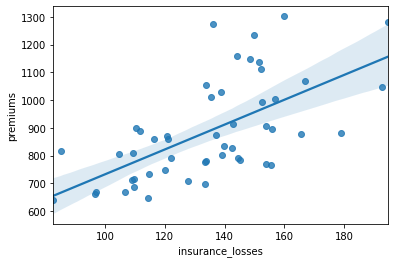

In [7]:
df=pd.read_csv(insurance_premiums_url)

# Create a regression plot of premium vs. insurances_losses
sns.regplot(x='insurance_losses', y='premiums', data=df)

plt.show()

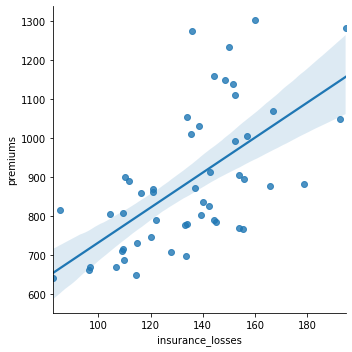

In [8]:
# Create an lmplot of premiums vs. insurance_losses
sns.lmplot(x='insurance_losses', y='premiums', data=df)

plt.show()

## Plotting multiple variables

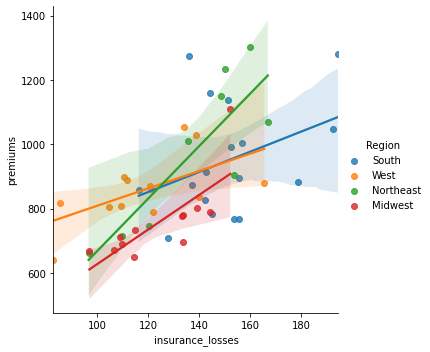

In [9]:
# Create a regression plot using hue
sns.lmplot(x='insurance_losses', y='premiums', data=df, hue='Region')

plt.show()

## Facetting multiple regressions

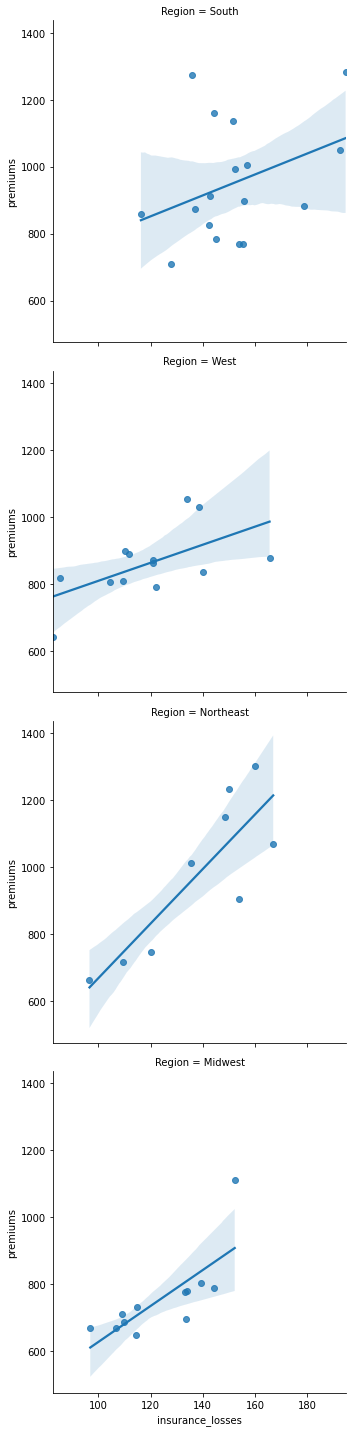

In [10]:
  # Create a regression plot with multiple rows
  sns.lmplot(x='insurance_losses', y='premiums', data=df, row='Region')

  plt.show()

#**Cusmotizing Seaborn Plots**
# Using Seaborn Styles
## Setting the default style

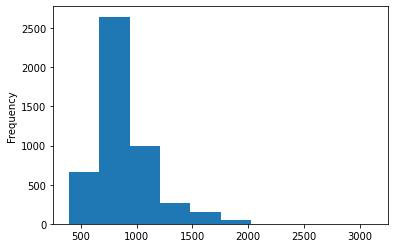

In [11]:
df=pd.read_csv(us_housing_urban_marketrent_2018url)

# Plot the pandas histogram
df['fmr_2'].plot.hist()
plt.show()

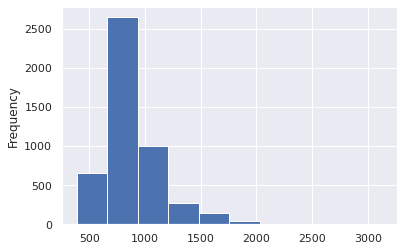

In [12]:
# Set the default seaborn style
sns.set()

# Plot the pandas histogram again
df['fmr_2'].plot.hist()
plt.show()

## Comparing styles

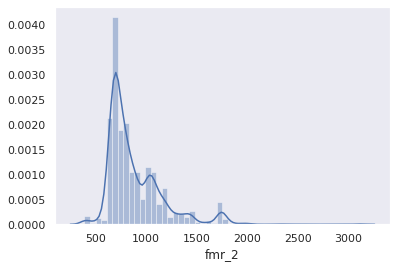

In [13]:
sns.set_style('dark')
sns.distplot(df['fmr_2'])
plt.show()

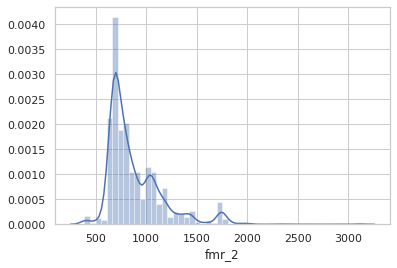

In [14]:
sns.set_style('whitegrid')
sns.distplot(df['fmr_2'])
plt.show()

## Removing spines

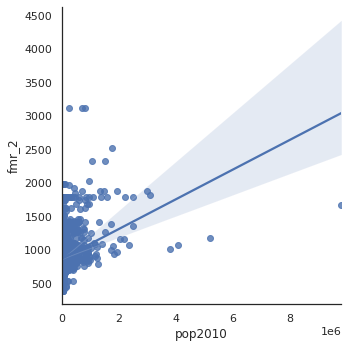

In [15]:
# Set the style to white
sns.set_style('white')

# Create a regression plot
sns.lmplot(x='pop2010', y='fmr_2', data=df)

#Remove the spines
sns.despine(top=True, right=True)

plt.show()

# Colors in Seaborn
## Matplotlib color codes

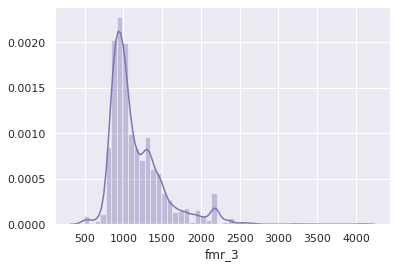

In [16]:
# Set style, enable color code, and create a magenta displot
sns.set(color_codes=True)
sns.distplot(df['fmr_3'], color='m')

plt.show()

## Using default palettes

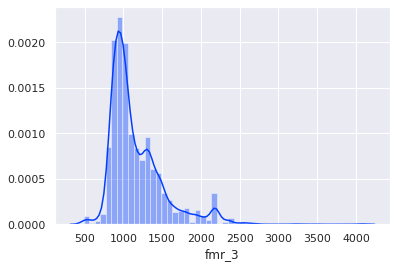

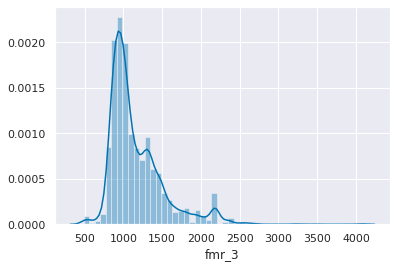

In [17]:
# Loop through differences between bright and colorblind palettes
for p in ['bright', 'colorblind']:
  sns.set_palette(p)
  sns.distplot(df['fmr_3'])
  plt.show()

## Creating Custom Palettes

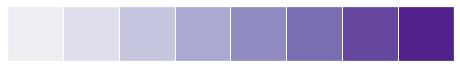

In [18]:
sns.palplot(sns.color_palette('Purples', 8))
plt.show()

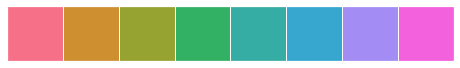

In [19]:
sns.palplot(sns.color_palette('husl', 8))
plt.show()

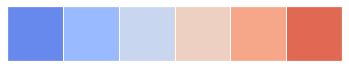

In [20]:
sns.palplot(sns.color_palette('coolwarm', 6))
plt.show()

# Customizing with matplotlib
## Using matplotlib axes

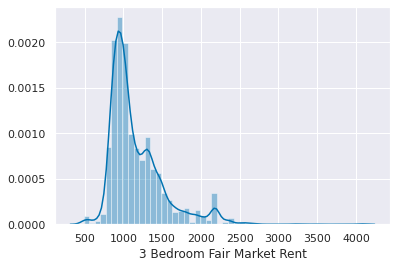

In [21]:
# Create a figure and axes
fig, ax=plt.subplots()

# Plot the distribution of data
sns.distplot(df['fmr_3'], ax=ax)

# Create a more descriptive x axis label
ax.set(xlabel='3 Bedroom Fair Market Rent')

plt.show()

## Additional plot customizations

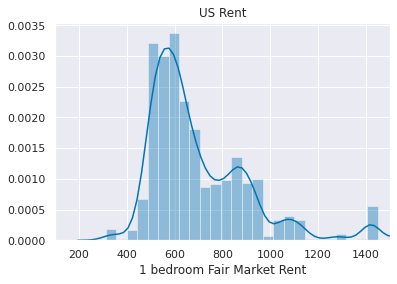

In [22]:
# Create a figure and axes
fig, ax=plt.subplots()

# Plot the distribution of 1 bedroom rents
sns.distplot(df['fmr_1'], ax=ax)

# Modify the properties of the plot
ax.set(xlabel='1 bedroom Fair Market Rent',
       xlim=(100, 1500),
       title='US Rent')

plt.show()

## Adding annotations

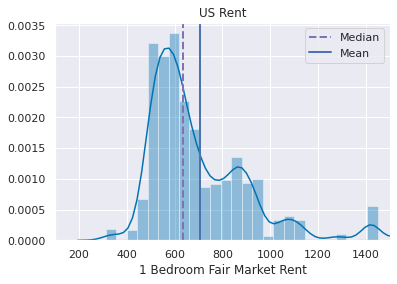

In [23]:
# Creating a figure and axes, Then plot the data
fig, ax=plt.subplots()
sns.distplot(df['fmr_1'], ax=ax)

# Customize the labels and limits
ax.set(xlabel='1 Bedroom Fair Market Rent',
       xlim=(100, 1500),
       title='US Rent')

# Add vertical lines for the median and mean
ax.axvline(x=df['fmr_1'].median(), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=df['fmr_1'].mean(), color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()

## Multiple plots

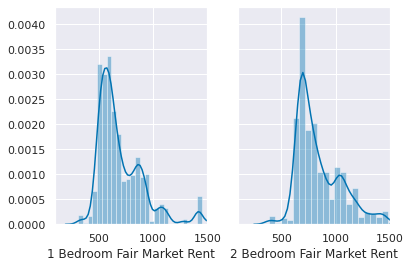

In [24]:
# Create a plot with with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of 1 bedrooms apartments on ax0
sns.distplot(df['fmr_1'], ax=ax0)
ax0.set(xlabel='1 Bedroom Fair Market Rent', xlim=(100, 1500))

# Plot the distribution of 2 bedrooms apartments on ax1
sns.distplot(df['fmr_2'], ax=ax1)
ax1.set(xlabel='2 Bedroom Fair Market Rent', xlim=(100, 1500))

plt.show()

#**Additional Plot Types**
# Categorical Plot Types
## stripplot() and swarmplot()

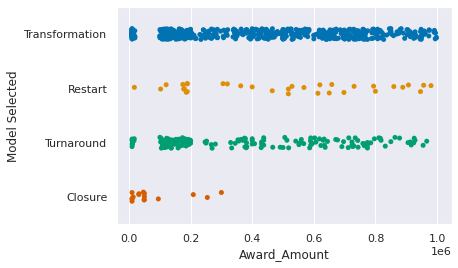

In [25]:
df=pd.read_csv(school_improvements_2010url)

# Create the stripplot
sns.stripplot(data=df, x='Award_Amount', y='Model Selected', jitter=True)

plt.show()

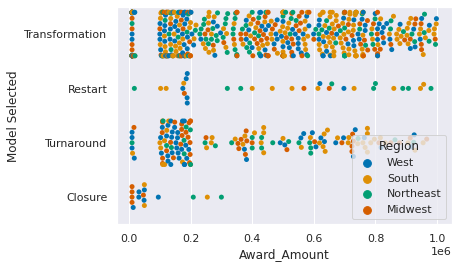

In [26]:
# Create and display a swarmplot with hue set to the Region
sns.swarmplot(data=df, x='Award_Amount', y='Model Selected', hue='Region')

plt.show()

## boxplots, violinplots and lvplots

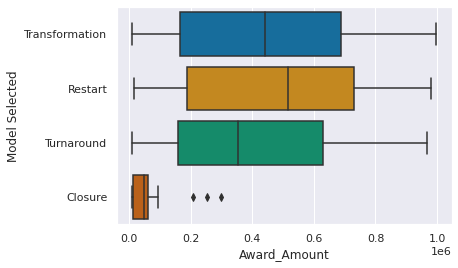

In [27]:
# Create a boxplot
sns.boxplot(data=df, x='Award_Amount', y='Model Selected')
plt.show()

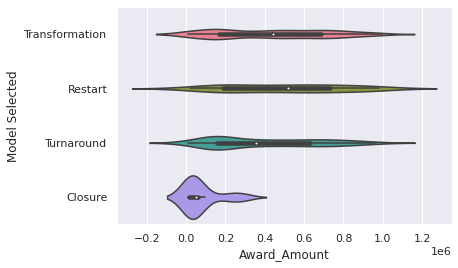

In [28]:
# Create a violinplot with the husl palette
sns.violinplot(data=df, x='Award_Amount', y='Model Selected', palette='husl')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2613: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


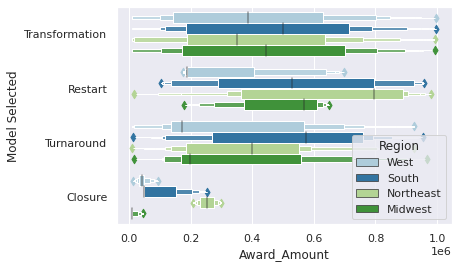

In [29]:
# Create a lvplot with the Paired palette and the Region column as the hue
sns.lvplot(data=df, x='Award_Amount', y='Model Selected', palette='Paired', hue='Region')

plt.show()

## barplots, pointplots and countplots

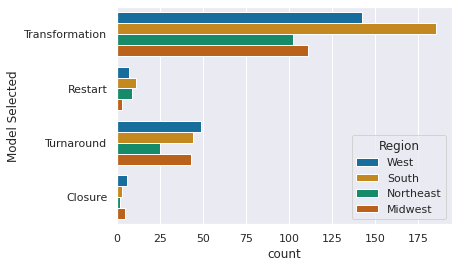

In [30]:
# Show a countplot with the number of models used with each region a different color
sns.countplot(data=df, y='Model Selected', hue='Region')

plt.show()

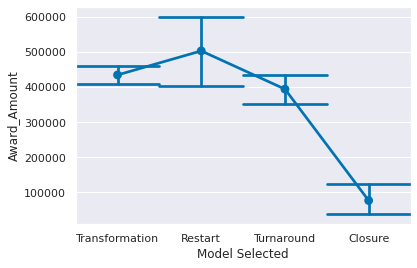

In [31]:
# Create a pointplot and include the capsize in order to show bars on the confidence interval
sns.pointplot(data=df, y='Award_Amount', x='Model Selected', capsize=1)

plt.show()

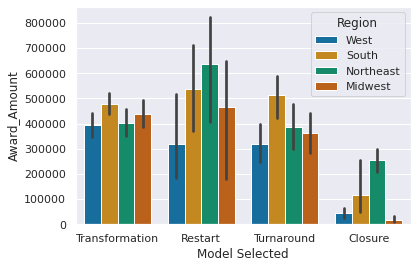

In [32]:
# Create a barplot with each Region shown as different color
sns.barplot(data=df, y='Award_Amount', x='Model Selected', hue='Region')

plt.show()

# Regression Plots
## Regression and residual plots

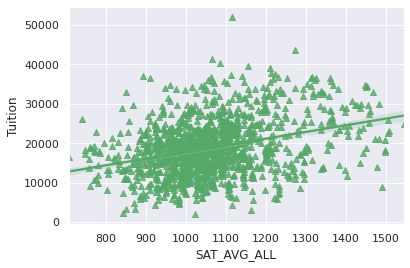

In [33]:
df=pd.read_csv(college_data_url)

# Display a regression plot for Tuition
sns.regplot(data=df, y='Tuition', x='SAT_AVG_ALL', marker='^', color='g')

plt.show()

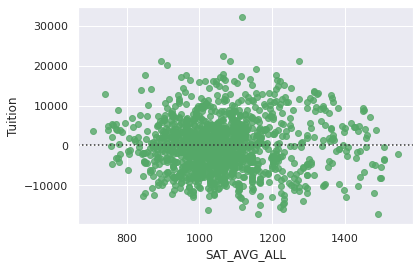

In [34]:
# Display the residual plot
sns.residplot(data=df, y='Tuition', x='SAT_AVG_ALL', color='g')

plt.show()

## Regression plot parameters

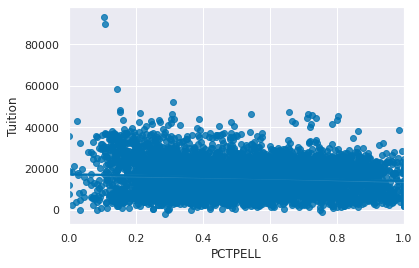

In [35]:
# Plot a regression plot of Tuition and the Percentage of Pell Grants
sns.regplot(data=df, y='Tuition', x='PCTPELL')

plt.show()

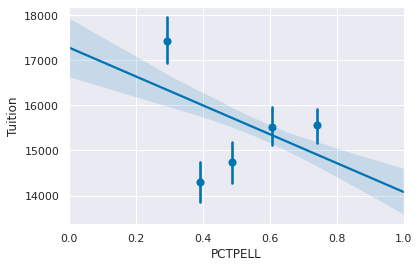

In [36]:
# Create another plot that estimates the tuition by PCTPELL
sns.regplot(data=df, y='Tuition', x='PCTPELL', x_bins=5)

plt.show()

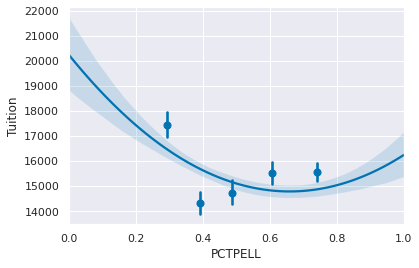

In [37]:
# The final plot should include a line using a 2nd order polynomial
sns.regplot(data=df, y='Tuition', x='PCTPELL', x_bins=5, order=2)

plt.show()

## Binning data

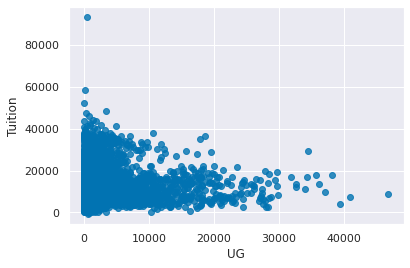

In [38]:
# Create a scatter plot by disabling the regression line
sns.regplot(data=df, y='Tuition', x='UG', fit_reg=False)

plt.show()

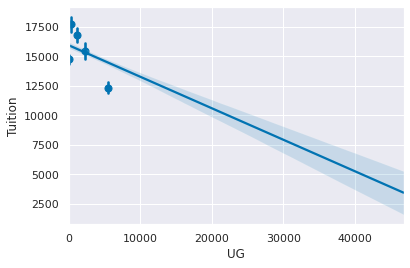

In [39]:
# Create a scatter plot and bin the data into 5 bins
sns.regplot(data=df, y='Tuition', x='UG', x_bins=5)

plt.show()

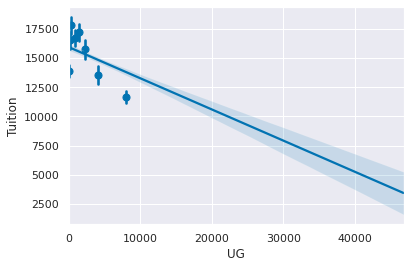

In [40]:
# Create a scatter plot and bin the data into 5 bins
sns.regplot(data=df, y='Tuition', x='UG', x_bins=8)

plt.show()

# Matrix plots
## Creating heatmaps

In [41]:
df=pd.read_csv(daily_show_guest_url)

# Create a crosstab table of the data
pd_crosstab=pd.crosstab(df['Group'], df['YEAR'])
print(pd_crosstab)

YEAR            1999  2000  2001  2002  2003  ...  2011  2012  2013  2014  2015
Group                                         ...                              
Academic           0     0     2     0     4  ...    10     8     8    10     2
Acting           108   100    92    84    74  ...    42    33    60    47    33
Advocacy           0     1     0     1     0  ...     1     2     2     3     3
Athletics          0     3     1     2     0  ...     2     7     4     4     3
Business           0     1     0     0     0  ...     3     3     3     1     1
Clergy             0     0     0     1     1  ...     1     2     0     0     0
Comedy            25    12    11     5    12  ...     7     6     6     9     7
Consultant         0     0     0     0     1  ...     0     0     0     0     0
Government         0     0     2     1     2  ...     3     3     7     6     0
Media             11    21    31    42    41  ...    51    52    51    53    24
Military           0     0     0     0  

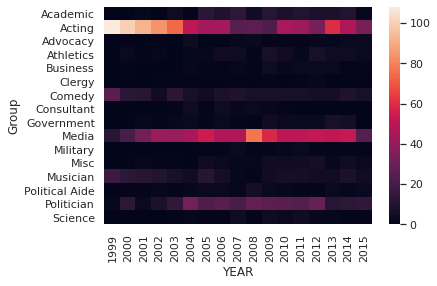

In [42]:
# Plot a heatmap of the table
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

## Customizing heatmaps

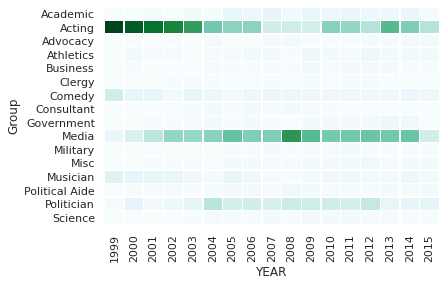

In [43]:
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(df['Group'], df['YEAR'])

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=False, cmap='BuGn', linewidths=0.3)

plt.show()

# **Creating Plots on Data Aware Grids**
# Using FacetGrid factorplot and lmplot
## Building a FacetGrid

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


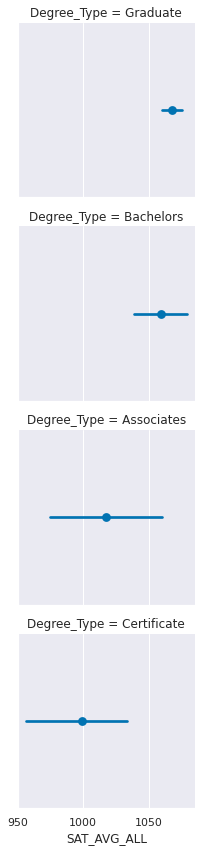

In [44]:
df = pd.read_csv(college_data_url)

# Create FaceGrid with Degree_Type and spcify the order of the rows using row_order
g2 = sns.FacetGrid(df, row='Degree_Type', row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

plt.show()

## Using a factorplot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


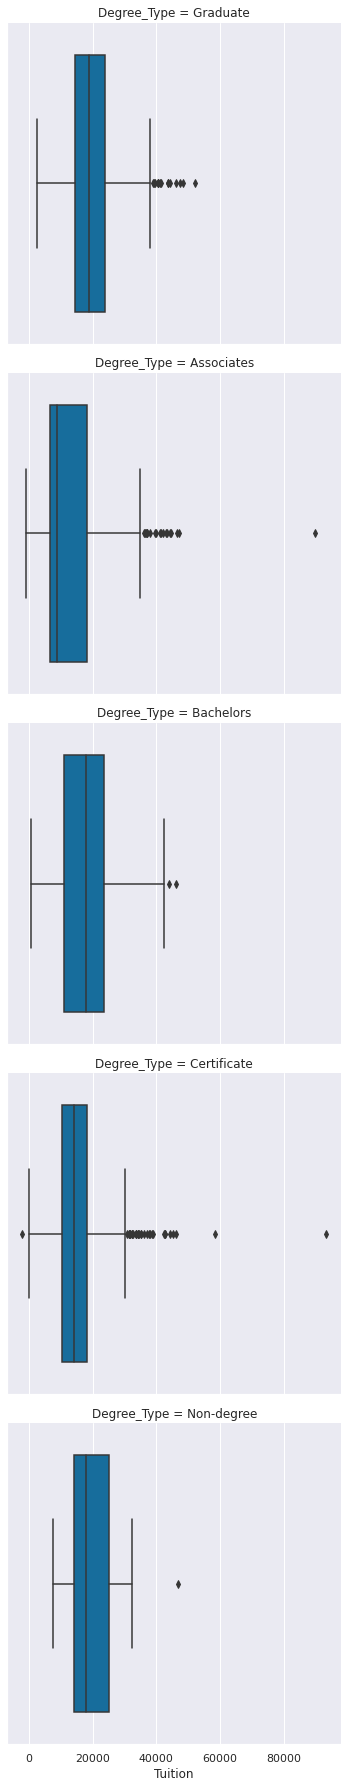

In [45]:
# Create a factor plot that contains boxplots of Tuition values
sns.factorplot(data=df, x='Tuition', kind='box', row='Degree_Type')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


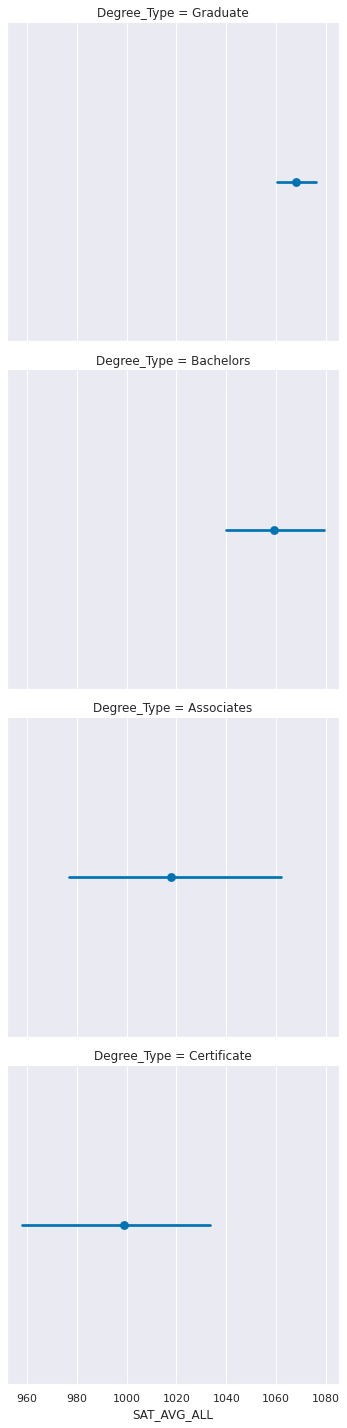

In [46]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type
sns.factorplot(data=df, x='SAT_AVG_ALL', kind='point', row='Degree_Type', row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()

## Using a lmplot

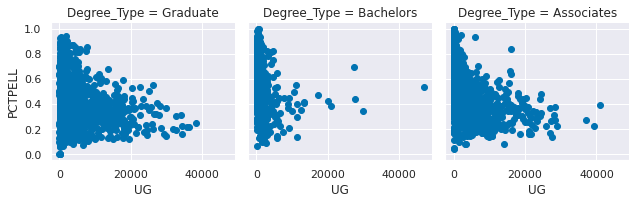

In [47]:
degree_ord = ['Graduate', 'Bachelors', 'Associates']

# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col='Degree_Type', col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()

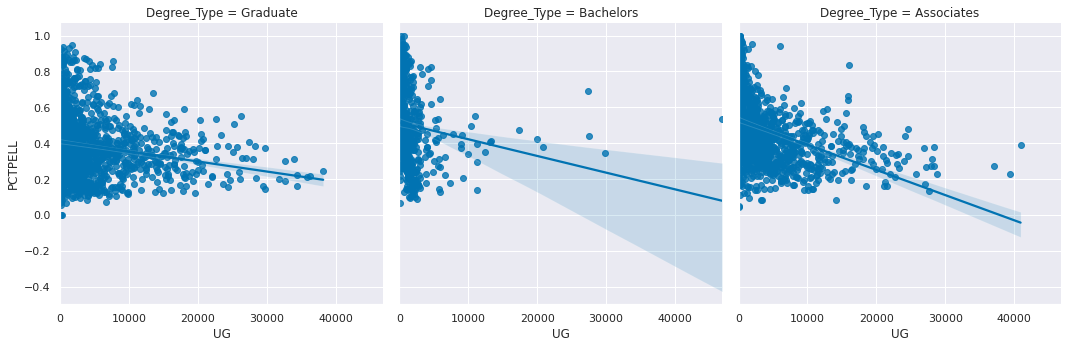

In [48]:
# Re-create the plot above as an lmplot
sns.lmplot(data=df, x='UG', y='PCTPELL', col='Degree_Type', col_order=degree_ord)

plt.show()

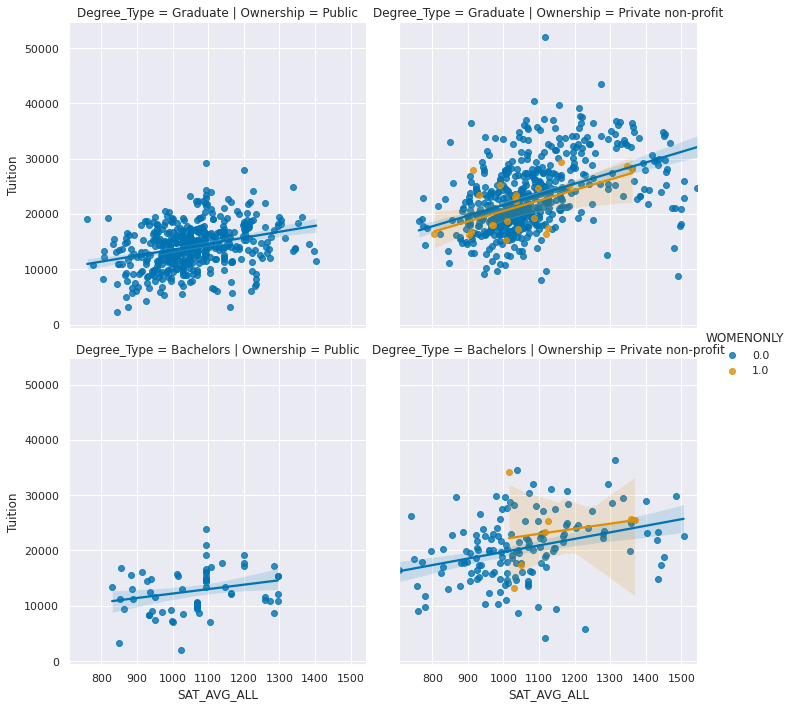

In [49]:
inst_ord = ['Public', 'Private non-profit']

# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df, x='SAT_AVG_ALL', y='Tuition', col='Ownership', row='Degree_Type', row_order=['Graduate', 'Bachelors'],
           hue = 'WOMENONLY', col_order=inst_ord)

plt.show()

# Using Pair Grid and pairplot
## Building a PairGrid

In [50]:
df = pd.read_csv(insurance_premiums_url)

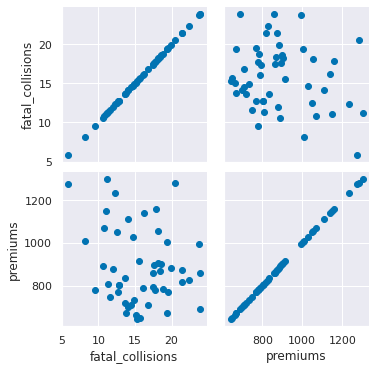

In [51]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=['fatal_collisions', 'premiums'])

g2 = g.map(plt.scatter)

plt.show()

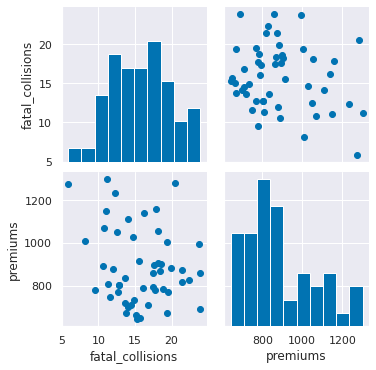

In [52]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars=['fatal_collisions', 'premiums'])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()

## Using a pairplot

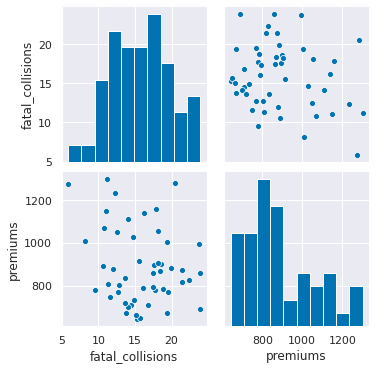

In [53]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df, vars=['fatal_collisions', 'premiums'], kind='scatter')

plt.show()

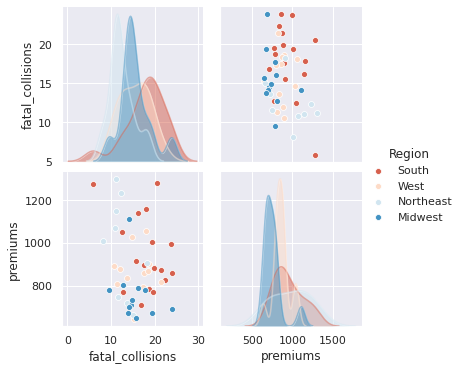

In [54]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df, vars=['fatal_collisions', 'premiums'],
             kind='scatter', hue='Region', palette='RdBu', diag_kws={'alpha':.5})

plt.show()

## Additional pairplots

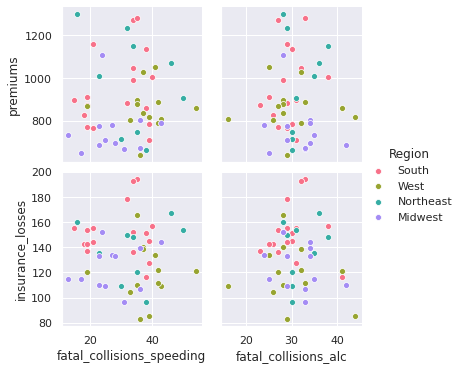

In [55]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df, x_vars=['fatal_collisions_speeding', 'fatal_collisions_alc'], 
             y_vars=['premiums', 'insurance_losses'],
             kind='scatter', hue='Region', palette='husl')

plt.show()

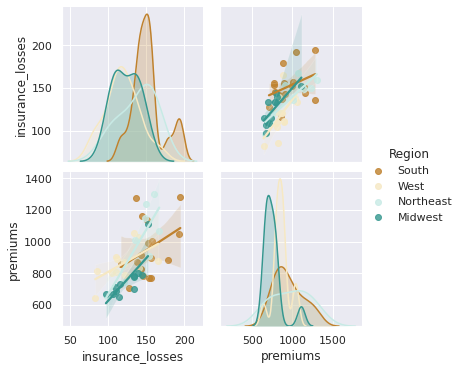

In [56]:
# Plot relationships between insurance_losses and premiums
sns.pairplot(data=df, vars=['insurance_losses', 'premiums'],
             kind='reg', palette='BrBG', diag_kind='kde', hue='Region')

plt.show()

# Using JointGrib and jointplot
## Building a JointGrid and jointplot

In [57]:
df = pd.read_csv(dc_bike_share_url)

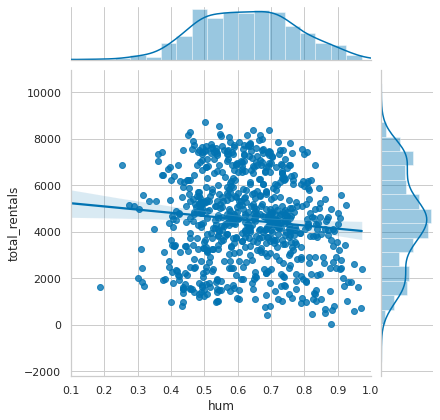

In [58]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style('whitegrid')
g = sns.JointGrid(x='hum', y='total_rentals', data=df, xlim=(0.1, 1.0))

g.plot(sns.regplot, sns.distplot)

plt.show()

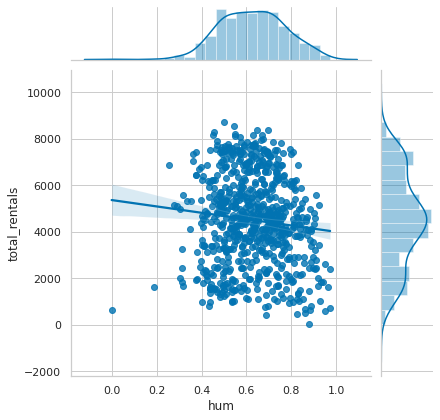

In [59]:
# Create a jointplot similar to the JointGrid
sns.jointplot(x='hum', y='total_rentals', kind='reg', data=df)

plt.show()

## Jointplots and regressions

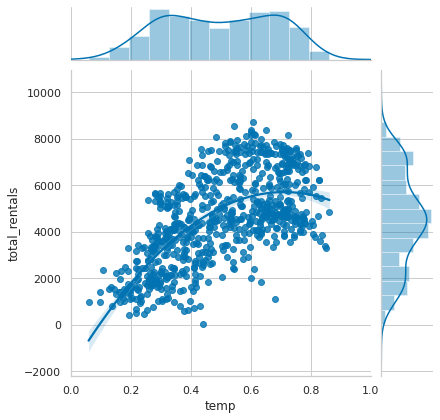

In [60]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x='temp', y='total_rentals', kind='reg', data=df, order=2, xlim=(0,1))

plt.show()

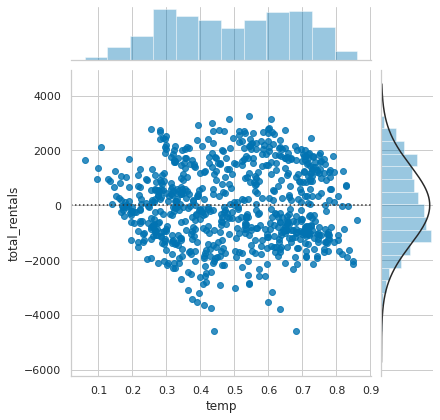

In [61]:
# Plot a jointplot showing the residuals
sns.jointplot(x='temp', y='total_rentals', kind='resid', data=df, order=2)

plt.show()

# Complex jointplots

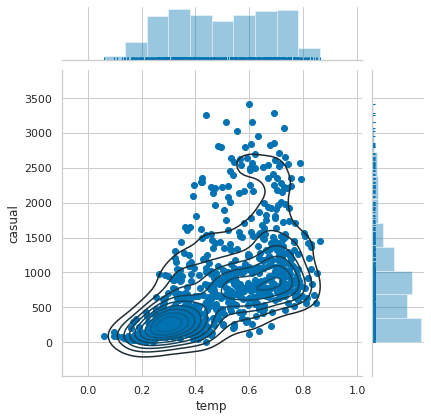

In [62]:
# Create a jointplot of temp vs.casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x='temp', y='casual', kind='scatter', data=df, 
                   marginal_kws=dict(bins=10, rug=True)).plot_joint(sns.kdeplot))

plt.show()

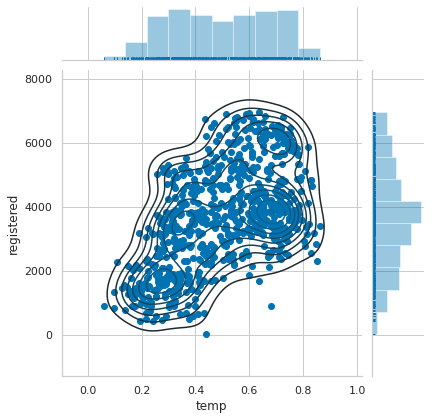

In [63]:
# Replicate the above plot but only for registered riders
g = (sns.jointplot(x='temp', y='registered', kind='scatter', data = df,
                   marginal_kws = dict(bins=10, rug=True)).plot_joint(sns.kdeplot))

plt.show()